***
***
# <div align="center"><font color='darkred'><b></b></font></div>
***
# <div align="center"><font color='indigo'><b></b></font></div>
***
# <div align="center"><font color='indigo'><b></b></font></div>
***
# <div align="center"><font color='darkred'><b>LOGISTIC REGRESSION</b></font></div>
***
***

### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## DATA PREPARATION AND CONVERSIONS

In [2]:
data=pd.read_csv("Iris.csv")                                                         # READING DATA
data.drop(columns=['Id'],inplace=True)                                               # RANDOMLY REARRANGING ROWS
data=data.sample(frac=1)                                                             # SEPARATING TEST DATA          
test_data=data[100:150]                                                                
test_data.reset_index(inplace=True)                                                 
data=data[:100]                                                                      # SLICING FOR TRAINING DATA

x=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]              # CONVERTING TO NUMPY
x=x.to_numpy()

x_test=test_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]    # TEST DATA CONVERSIONS
x_test=x_test.to_numpy()
y_test=test_data[['Species']]

iris1=data[['Species']].copy()                                                       # MAPPING LABELS FOR CLASS 1 AND CONVERSION
order={'Iris-setosa':0,'Iris-versicolor':0,'Iris-virginica':1}
iris1['Species']=iris1['Species'].map(order)
iris1['Species']=iris1['Species'].astype(int)
y1=iris1[['Species']]
y1=y1.to_numpy()

iris2=data[['Species']].copy()
order={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':0}
iris2['Species']=iris2['Species'].map(order)
iris2['Species']=iris2['Species'].astype(int)
y2=iris2[['Species']]
y2=y2.to_numpy()

iris3=data[['Species']].copy()
order={'Iris-setosa':1,'Iris-versicolor':0,'Iris-virginica':0}
iris3['Species']=iris3['Species'].map(order)
iris3['Species']=iris3['Species'].astype(int)
y3=iris3[['Species']]
y3=y3.to_numpy()

## LOGISTIC REGRESSION CLASS

In [12]:
class LOGISTIC_REGRESSION():
    def __init__(self,x):                                     # CLASS CONSTRUCTOR: IT WILL CREATE
        self.theta=np.random.random(size=(1,x.shape[1]+1))    # WITH SHAPE 1*d+1
        self.previous_theta=np.zeros(shape=(1,x.shape[1]+1))  # FOR OTHER STOPPING CRITERIA
    
    def One_Adder(self,x):                                    # FUNCTION FOR APPENDING ONES TO X
        return np.hstack((x,np.ones((x.shape[0],1))))
    
    def Get_Weights(self):                                    # FUNCTION FOR RETURNING THETA
        return self.theta
    
    def sigmoid(self,x):                                      # FUNCTION THAT RETURNS SIGMOID OF ANY X VALUES
        return 1/(1+np.exp(-x))
    
    def Hypothesis(self,x,theta):                             # HYPOTHESIS FUNCTION THAT RETURNS 
        return self.sigmoid(np.dot(x,theta.reshape(-1,1)))    # PROBABILITY OF AN INSTANCE BELONGING TO A CLASS
    
    def Cost_Function(self,x,y,theta):                        # FUNCTION THAT RETURNS THE COST/LOSS
        hypothesis=self.Hypothesis(x,theta)                   # GETTING HYPOTHESIS FOR THE FOLLOWING FUNCTION    
        return -np.mean(y*np.log(hypothesis)+(1-y)*np.log(1-hypothesis))
    
    def Derivative_Cost_Function(self,x,y,theta):             # FUNCTION THAT RETURNS THE SUM OF DERIVATIVES OF COST FUNCTION
        hypothesis=self.Hypothesis(x,theta)
        return np.mean((hypothesis-y)* x,axis=0)

    def Gradient_Descent(self,theta,derivative,learning_rate=0.01):   # FUNCTION FOR UPDATING THETA
        return theta-(learning_rate*derivative)    
    
    def Loss_Plotter(self,loss):                               # FUNCTION FOR GENERATING GRAPH OF LOSS DURING TRAINING
        plt.plot(loss)
        plt.xlabel('Epochs')
        plt.ylabel('loss')
        plt.show()
        
    def Train(self,x,y,learning_rate=0.01,max_iterations=0,print_loss_after=100):       # TRAINING FUNCTION
        x=self.One_Adder(x)                                                             # APPENDING ONES
        loss=[]                                                                         # FOR STORING LOSS
        if max_iterations>0:                                                            # IF MAX ITERATIONS ARE GIVEN
            for i in range(max_iterations):                                        
                derivative=self.Derivative_Cost_Function(x,y,self.theta)                # GET DERIVATIVE
                self.theta=self.Gradient_Descent(self.theta,derivative,learning_rate)   # UPDATE THETA
                loss.append(self.Cost_Function(x,y,self.theta))                         # APPEND LOSS
                if np.any(np.isnan(self.theta)) or np.any(np.isinf(self.theta)):        # CHECKING FOR INVALID VALUES
                    print("\n\n\n Learning rate too high resulting in Nan and inf values")
                    break
                if  i%print_loss_after==0:       
                    cost=self.Cost_Function(x,y,self.theta)                             # PRINT LOSS
                    print(f'epoch {i} loss = {cost}')
        else:                                                                       # IF MAX ITERATIONS ARE NOT GIVEN THEN
            i=0                                                                     # COUNTER FOR KEEPING TRACK OF ITERATION NO.
            threshold=1.66                                                          # RANDOM THRESHOLD
            while not np.array_equal(self.theta,self.previous_theta) or  np.any(np.linalg.norm(self.theta)<threshold):               # STOPPING CITERIA: THETA = PRECIOUS THETA
                derivative=self.Derivative_Cost_Function(x,y,self.theta)               # GET DERIVATIVE
                self.previous_theta=self.theta                                         # UPDATE PREVIOUS THETA
                self.theta=self.Gradient_Descent(self.theta,derivative,learning_rate)  # UPDATE THETA
                loss.append(self.Cost_Function(x,y,self.theta))                        # APPEND LOSS
                if np.any(np.isnan(self.theta)) or np.any(np.isinf(self.theta)):       # CHECKING FOR INVALID VALUES
                    print("\n\n\n Learning rate too high resulting in Nan and inf values")
                    break
                if np.any(np.linalg.norm(self.theta)>threshold):                    # STOPPING CRITERIA:SELF DEFINED THRESHOLD
                    print('threshold reached')
                    break
                if  i%print_loss_after==0:       
                    cost=self.Cost_Function(x,y,self.theta)                        # PRINT LOSS
                    print(f'epoch {i} loss = {cost}')     
                i=i+1                                                              # INCREMENT COUNTER 
        self.Loss_Plotter(loss)    
        print("Selected weights are ",self.Get_Weights())                      # PRINT SELECTED WEIGHTS AND PLOT THEM
            
    def Predict_Class(self, x):
        x = self.One_Adder(x)                                                      # APPEND ONES TO X
        choosen_weights = self.Get_Weights()                                       # GET WEIGHTS
        hypothesis = self.Hypothesis(x, choosen_weights)                           # RETURN HYPOTHESIS OF WEIGHTS 
        predictions=[]
        for i in range(len(hypothesis)):
            if hypothesis[i] > 0.5:                                                # CLOSE TO 1 == TRUE ELSE FALSE                                           
                predictions.append(1)
            else:
                predictions.append(0)
        return predictions

    def Predict_Confidence(self,x):                                                # FUNCTION TO PREDICT THE VALUES
        x = self.One_Adder(x)                                                      # APPEND ONES TO X
        choosen_weights=self.Get_Weights()                                         # GET WEIGHTS
        return self.Hypothesis(x,choosen_weights)                                  # RETURN PROBABILITY OF BELONGING

## CREATING THREE INSTANCES

In [4]:
virginica=LOGISTIC_REGRESSION(x)                                # OBJECT FOR CLASS WHERE VIRGINICA IS 1  
versicolor=LOGISTIC_REGRESSION(x)                               # OBJECT FOR CLASS WHERE VERSICOLOR IS 1                      
setosa=LOGISTIC_REGRESSION(x)                                   # OBJECT FOR CLASS WHERE SETOSA IS 1 

### FUNCTION FOR CALCULATING ACCURACY

In [5]:
def Accuracy_calculator(y,predicted_y):                        # FUNCTION FOR MANUALLY CALCULATING ACCURACY
    count=0        
    for i in range(len(y)):
        if y[i]==predicted_y[i]:
            count+=1
    return count*100/len(y)

### FUNCTION FOR TRAINING ALL THREE INSTANCES

TO SAVE REWRITING THE SAME CODE AGAIN AND AGAIN FOR THREE OBJECT WE CAN DO IT WITH THE FOLLOWING FUNCTION

In [6]:
def collective_training(objects,classes,x,y,learning_rate=0.01,max_iterations=0,print_loss_after=10):
    for i in range(len(objects)):
        print(classes[i])
        objects[i].Train(x,y[i],learning_rate=learning_rate,max_iterations=max_iterations,print_loss_after=print_loss_after)    
        print('Updated weights after training are',objects[i].Get_Weights())                         
        print("Confidence is ",objects[i].Predict_Confidence(x).ravel())
        print("TRAINING ACCURACY ",Accuracy_calculator(objects[i].Predict_Class(x),y[i]),"%\n\n")

virginica
epoch 0 loss = 375.40211729725786
epoch 200 loss = 29.707637387314367
epoch 400 loss = 23.97372361817843
epoch 600 loss = 20.751045619125087
epoch 800 loss = 18.594404624721328
epoch 1000 loss = 17.035347847389886
epoch 1200 loss = 15.85148316854049
epoch 1400 loss = 14.919787113482766
epoch 1600 loss = 14.166013824498243
epoch 1800 loss = 13.54257392978788
epoch 2000 loss = 13.017530172452348
epoch 2200 loss = 12.568643967480822
epoch 2400 loss = 12.1799498991799
epoch 2600 loss = 11.83968661614253
epoch 2800 loss = 11.538996035815172
epoch 3000 loss = 11.271077449343224
epoch 3200 loss = 11.030621204573027
epoch 3400 loss = 10.813419820567749
epoch 3600 loss = 10.61609490627326
epoch 3800 loss = 10.435901552349728
epoch 4000 loss = 10.270585705374335
epoch 4200 loss = 10.11827849716242
epoch 4400 loss = 9.977416812691668
epoch 4600 loss = 9.846682790574043
epoch 4800 loss = 9.72495718649473
epoch 5000 loss = 9.611283024834545
epoch 5200 loss = 9.504836980298933
epoch 5400 l

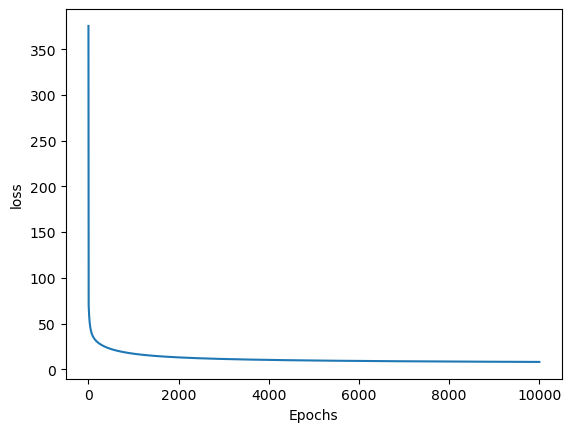

Selected weights are  [[-2.90609191 -3.86734264  4.33296515  6.10887094 -2.31186846]]
Updated weights after training are [[-2.90609191 -3.86734264  4.33296515  6.10887094 -2.31186846]]
Confidence is  [5.04464680e-02 2.08699537e-11 9.76541064e-01 7.72027563e-11
 6.53849309e-01 7.77275055e-11 9.81472751e-01 4.33730951e-03
 4.96308019e-08 9.56765985e-10 5.26532938e-01 9.51803694e-01
 4.82282875e-03 3.70560710e-03 4.90224553e-01 2.59611950e-02
 1.87464004e-02 9.95614968e-01 9.67467247e-01 1.29178760e-10
 2.15458734e-09 8.67139433e-10 4.63892631e-10 1.28211096e-01
 5.87258415e-10 8.08824941e-11 4.93180358e-10 9.85089788e-01
 3.75666365e-02 1.10929582e-09 4.53292027e-01 2.79081760e-11
 1.80133882e-02 1.90556365e-03 6.42547874e-01 6.35459167e-02
 9.98846329e-01 9.71132702e-03 6.50905230e-10 9.96881315e-01
 1.42189675e-11 9.90770927e-01 6.76755666e-01 4.31330631e-12
 8.13200257e-10 5.22845191e-11 9.95292210e-01 9.40398793e-02
 4.93180358e-10 8.38849273e-04 7.62316940e-01 8.43178533e-01
 1.8855

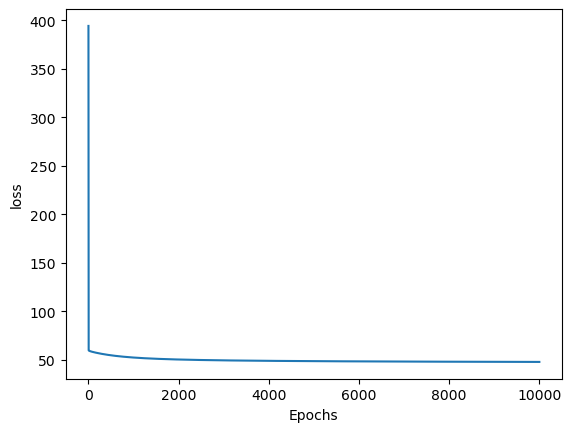

Selected weights are  [[ 0.16034478 -2.20610368  1.76335862 -3.74284459  2.82132764]]
Updated weights after training are [[ 0.16034478 -2.20610368  1.76335862 -3.74284459  2.82132764]]
Confidence is  [0.54578666 0.07050714 0.07764812 0.10664306 0.34646282 0.03179782
 0.05887313 0.76676921 0.41056106 0.14424326 0.79288942 0.50540702
 0.65141207 0.45266146 0.17290621 0.14544365 0.52871227 0.06353794
 0.81394819 0.06085773 0.21282883 0.21565639 0.12556149 0.69358257
 0.13741063 0.10249788 0.27664783 0.39786149 0.24059719 0.12037436
 0.73754966 0.06946352 0.48057851 0.23217879 0.28586685 0.59283588
 0.08200129 0.29087243 0.05260702 0.31831625 0.07767661 0.86654367
 0.15597014 0.04232417 0.06939693 0.06468808 0.42196271 0.65194925
 0.27664783 0.33109729 0.44481493 0.69667073 0.46953789 0.35199654
 0.8051365  0.02399491 0.23266318 0.53357657 0.25521929 0.41984046
 0.02867475 0.41679016 0.35550208 0.02099447 0.22286431 0.50791797
 0.44524241 0.54154838 0.72391572 0.57522135 0.19595364 0.72952

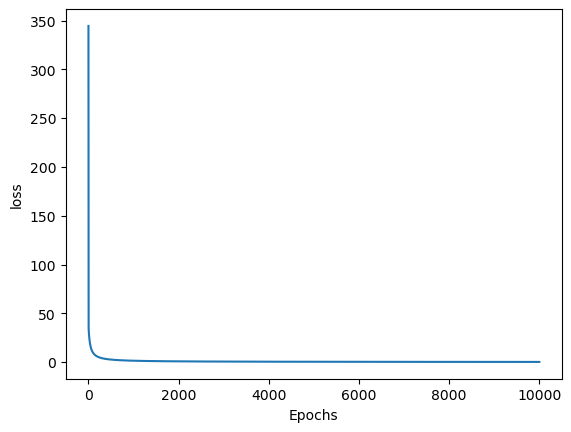

Selected weights are  [[ 0.45694912  2.82939304 -3.86694791 -1.64474422  0.66005315]]
Updated weights after training are [[ 0.45694912  2.82939304 -3.86694791 -1.64474422  0.66005315]]
Confidence is  [1.66133327e-04 9.99428664e-01 8.81408810e-06 9.99006665e-01
 4.08137236e-05 9.99023445e-01 9.62288914e-06 2.50081443e-03
 9.75954606e-01 9.97701967e-01 2.03411176e-05 7.15681494e-06
 7.01078879e-03 1.95342475e-03 1.10346049e-04 9.00938567e-04
 1.46104754e-04 2.05577756e-06 3.92935834e-07 9.99076318e-01
 9.91814692e-01 9.96475925e-01 9.98507472e-01 3.61429586e-04
 9.97419735e-01 9.98898184e-01 9.96682848e-01 4.11048810e-07
 3.59507376e-04 9.98288558e-01 2.19347266e-05 9.99401967e-01
 1.10623036e-03 9.61307144e-03 4.66420019e-05 6.36300439e-04
 3.97229763e-06 7.24143425e-04 9.96786220e-01 8.93307917e-07
 9.99556411e-01 4.59216951e-07 3.27477805e-05 9.99828680e-01
 9.98460574e-01 9.99273192e-01 1.23796165e-06 2.35757878e-04
 9.96682848e-01 3.40235636e-02 2.18696132e-05 1.22262138e-05
 9.9731

In [7]:
collective_training([virginica,versicolor,setosa],['virginica','versicolor','setosa'],x,[y1,y2,y3],learning_rate=0.05,max_iterations=10000,print_loss_after=200)

### FUNCTION FOR PREDICTING LABELS OF TEST DATA BASED ON PREDICT CONFIDENCE AND PREDICT <br> <br> CLASS FUNCTIONS

In [8]:
def predict_classes_for_test_data(obj1,obj2,obj3,x_test,y_test):      # FUNCTION THAT RETURNS THE PREDICTED LABELS 
    labels=[]                                                         # CREATING A LIST TO STORE THE PREDICTIONS 
    
    # TAKING PREDICTIONS OF ALL THREE CLASS ALONG WITH THE CONFIDENCE FOR EACH PREDICTION 
    predicted_as_class1=obj1.Predict_Class(x_test)                  
    confidence_class1=obj1.Predict_Confidence(x_test)
    predicted_as_class2=obj2.Predict_Class(x_test)
    confidence_class2=obj2.Predict_Confidence(x_test)
    predicted_as_class3=obj3.Predict_Class(x_test)
    confidence_class3=obj3.Predict_Confidence(x_test)

    # LOOP FOR PREDICTING LABELS OF EACH INSTANCE 
    for i in range(len(x_test)):
        if predicted_as_class1[i]==1:                                   # IF CLASS ONE PREDICTS THE LABEL AS ONE 
            if predicted_as_class2==0 and predicted_as_class3==0:       # CHECK IF OTHER CLASS ARE 0 AND ASSIGN THE LABEL        
                labels.append('Iris-virginica')
                continue                                                # NO NEED TO CHECK OTHER CONDITIONS
            elif confidence_class1[i]>=confidence_class2[i] and confidence_class1[i]>=confidence_class3[i]:
                labels.append('Iris-virginica')                         # IN CASE LABEL IS 1 CHECK THE CONFIDENCE IS HIGH 
                continue
            elif predicted_as_class1[i]==predicted_as_class2[i] or predicted_as_class1[i]==predicted_as_class3[i]:
                if confidence_class1[i]>=confidence_class2[i] and confidence_class1[i]>=confidence_class3[i]:
                    labels.append('Iris-virginica')                     # IN CASE ON SAME LABELS + HIGH CONFIDENCE
                    continue

        #  SIMILARLY FOR OTHER CLASSES      
        if predicted_as_class2[i]==1:
            if predicted_as_class1==0 and predicted_as_class3==0:
                labels.append('Iris-versicolor')
                continue
            elif confidence_class2[i]>=confidence_class1[i] and confidence_class2[i]>=confidence_class3[i]:
                labels.append('Iris-versicolor')
                continue
            elif predicted_as_class1[i]==predicted_as_class2[i] or predicted_as_class2[i]==predicted_as_class3[i]:
                if confidence_class2[i]>=confidence_class1[i] and confidence_class2[i]>=confidence_class3[i]:
                    labels.append('Iris-versicolor')
                    continue
                
        if predicted_as_class3[i]==1:
            if predicted_as_class1==0 and predicted_as_class2==0:
                labels.append('Iris-setosa')
                continue
            elif confidence_class3[i]>=confidence_class1[i] and confidence_class3[i]>=confidence_class2[i]:
                labels.append('Iris-setosa')
                continue
            elif predicted_as_class3[i]==predicted_as_class2[i] or predicted_as_class3[i]==predicted_as_class1[i]:
                if confidence_class3[i]>=confidence_class1[i] and confidence_class3[i]>=confidence_class2[i]:
                    labels.append('Iris-setosa')
                    continue   
                
        # NOW IF ALL PREDICTED ARE ZERO CHECK FOR THE ONE WITH THE LOWEST CONFIDENCE
        elif confidence_class1[i]<=confidence_class2[i] and confidence_class1[i]<=confidence_class3[i]:
            labels.append('Iris-virginica')
            continue
        elif confidence_class2[i]<=confidence_class1[i] and confidence_class2[i]<=confidence_class3[i]:
            labels.append('Iris-versicolor')
            continue
        else: 
            labels.append('Iris-setosa')
            continue
    return labels

<b> BASIC IDEA OF THIS FUNCTION : </b> <br>
1- PREDICTION LABEL == 1 THEN CHECK <br>
  &nbsp;  * IF THE OTHER TWO OBJECT HAVE PREDICTED 0 THEN THE INSTANCE BELONGS TO THE GIVEN CLASS <br>
  &nbsp;  * IF LABEL ==1 WITH HIGH CONFIDENCE THEN THE LABEL IS CORRECT <br>
  &nbsp;  * IF TWO LABELS ARE SAME THEN ON THE BASIS OF CONFIDENCE ASSIGN <br>
2- PREDICTION LABEL == 0 FOR ALL CLASSES THEN <br>
  &nbsp;  * CHECK THE LABEL OBJECT WHICH HAS THE LOWEST CONFIDENCE OF NOT BELONGING TO A PARTICULAR CLASS <br>

In [9]:
predicted_y=predict_classes_for_test_data(virginica,versicolor,setosa,x_test,y_test)
predicted_y

['Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa']

### ACCURACY OF TRAINING DATA

In [11]:
print("ACCURACY OF TESTING DATA IS ",Accuracy_calculator(y_test['Species'],predicted_y),"%")

ACCURACY OF TESTING DATA IS  84.0 %


***
***
***
# <div align="center"><font color='DARKRED'><b>END</b></font></div>
***
***
***
